In [237]:
import numpy as np
import matplotlib.pyplot as plt

### Create data

In [238]:
# original coeff
a = 2
b = 10

def original_func(x: float) -> float:
    return a + x * b

def get_noise(x: float) -> float:
    return x + np.random.normal(0,900)

In [239]:
# generation samples
n = 200

x = [y for y in range(n)]
y = list(map(original_func, x))

# add noise
y_with_noise = list(map(get_noise, y))

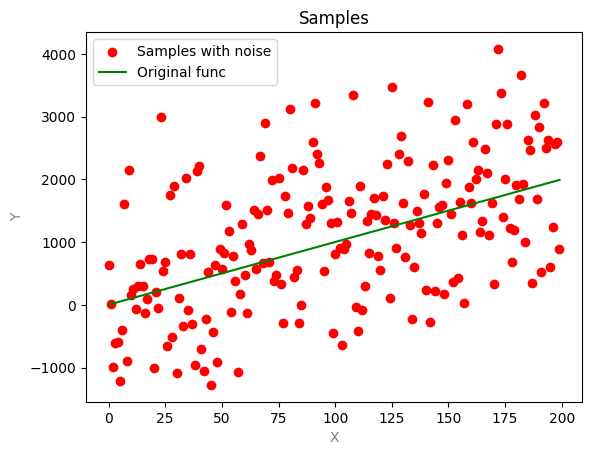

In [240]:
plt.scatter(x, y_with_noise, c="r")
plt.plot(y, c="g")
plt.title("Samples")
plt.xlabel("X", color='gray')
plt.ylabel("Y", color='gray')
plt.legend(['Samples with noise', 'Original func'])
plt.show()

# Predict using formulas for $a$ and $b$

In [241]:
def get_b(x: list[float], y: list[float]) -> float:
  numerator_1 = np.sum(np.array(x) @ np.array(y))
  numerator_2 = np.sum(x) * np.sum(y) / n
  denominator_1 = np.sum(np.array(x)**2)
  denominator_2 = np.sum(np.array(x))**2 / n
  return (numerator_1 - numerator_2)\
         /(denominator_1 - denominator_2)

def get_a(x: list[float], y: list[float]) -> float:
  part_1 = np.sum(np.array(x) @ np.array(y))\
           /np.sum(np.array(x))
  part_2 = get_b(x, y) * np.sum(np.array(x)**2)\
          /np.sum(np.array(x))
  return part_1 - part_2


In [242]:
b_hat = get_b(x,y_with_noise)
b_hat

10.030027532623505

In [243]:
b_check = get_b(x,y)
b_check

10.0

In [244]:
a_hat = get_a(x, y_with_noise)
a_hat

116.86674453478008

In [245]:
a_check = get_a(x, y)
a_check

2.0

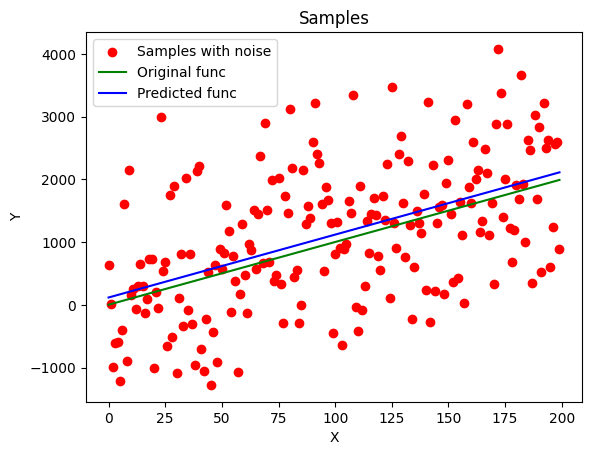

In [246]:
y_pred = list(map(lambda x: a_hat + b_hat * x, x))

plt.scatter(x, y_with_noise, c="r")
plt.plot(x, y, c="g")
plt.plot(x, y_pred, c="b")
plt.title("Samples")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(['Samples with noise', 'Original func', 'Predicted func'])
plt.show()

### Optimize cost function and search $a$ and $b$ using gradient descent